### Compare theoretical and ground state energy at unit filling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pimc
import importlib

### Simulation parameters

In [ ]:
# Simulation parameters
N = 4
L = N   # unit-filling
t = 0
U = 1
mu = -0.1
canonical = True # False for Grand Canonical simulation
    
# PIMC parameters
beta = 1
eta = 1/np.sqrt(L*beta)      # worm end fugacity

# Create unit filling initial configuration
alpha = []
for i in range(L):
    alpha.append(1)
alpha

data_struct = pimc.create_data_struct(alpha)
head_loc = []
tail_loc = []
pimc.view_worldlines(data_struct,beta,figure_name=None)

### Do many iterations of the set of PIMC-WA updates

In [ ]:
importlib.reload(pimc)
# Do insert many times on the above configuration
data_struct = pimc.create_data_struct(alpha)
head_loc = []
tail_loc = []
mc_steps = int(1E+05)
egs = 0
N_egs = 0 # number of times egs was measured
for m in range(mc_steps):
    
    ctr = 1
    pimc.worm_insert(data_struct,beta,head_loc,tail_loc,U,mu,eta)
    N_check = pimc.N_tracker(data_struct,beta)
    if N_check < N-1 or N_check > N+1:
        print("N bad! at mc_step # %.d after update # %.d"%(m,ctr))
        break
        
    ctr = 2
    pimc.worm_delete(data_struct,beta,head_loc,tail_loc,U,mu,eta)
    N_check = pimc.N_tracker(data_struct,beta)
    if N_check < N-1 or N_check > N+1:
        print("N bad! at mc_step # %.d after update # %.d"%(m,ctr))
        break
    
    ctr = 3
    pimc.worm_timeshift(data_struct,beta,head_loc,tail_loc, U, mu)
    N_check = pimc.N_tracker(data_struct,beta)
    if N_check < N-1 or N_check > N+1:
        print("N bad! at mc_step # %.d after update # %.d"%(m,ctr))
        break
        
    ctr = 4
    pimc.insert_gsworm_zero(data_struct,beta,head_loc,tail_loc,U,mu,eta,canonical,N)
    N_check = pimc.N_tracker(data_struct,beta)
    if N_check < N-1 or N_check > N+1:
        print("N bad! at mc_step # %.d after update # %.d"%(m,ctr))
        break
        
    ctr = 5
    pimc.delete_gsworm_zero(data_struct, beta, head_loc, tail_loc,U,mu,eta,canonical,N)
    N_check = pimc.N_tracker(data_struct,beta)
    if N_check < N-1 or N_check > N+1:
        print("N bad! at mc_step # %.d after update # %.d"%(m,ctr))
        break

    ctr = 6
    pimc.insert_gsworm_beta(data_struct,beta,head_loc,tail_loc,U,mu,eta,canonical,N)
    N_check = pimc.N_tracker(data_struct,beta)
    if N_check < N-1 or N_check > N+1:
        print("N bad! at mc_step # %.d after update # %.d"%(m,ctr))
        break
        
    ctr = 7
    pimc.delete_gsworm_beta(data_struct, beta, head_loc, tail_loc,U,mu,eta,canonical,N)
    N_check = pimc.N_tracker(data_struct,beta)
    if N_check < N-1 or N_check > N+1:
        print("N bad! at mc_step # %.d after update # %.d"%(m,ctr))
        break

In [ ]:
# importlib.reload(pimc)
# pimc.view_worldlines(data_struct,beta,figure_name=None)
# for m in range(10):
#     if pimc.N_tracker(data_struct,beta) < N+1 or pimc.N_tracker(data_struct,beta) > N-1:
#         print("N good")
#     pimc.delete_gsworm_zero(data_struct, beta, head_loc, tail_loc,U,mu,eta,canonical,N)
#     pimc.view_worldlines(data_struct,beta,figure_name=None)

In [ ]:
print("-------- Ground State Energy --------")
#print("PIMC: %.8f"%(egs/N_egs))
print("Exact: %.8f"%egs_theory(L,U,mu))
print("Samples: %d"%N_egs)
head_loc,tail_loc

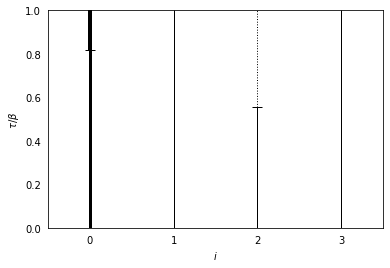

In [345]:
pimc.view_worldlines(data_struct,beta,figure_name=None)